In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#  matplotlib.style.use('ggplot')
%matplotlib inline
from scipy import stats
import os
# plt.style.use('dark_background')

In [2]:
df = pd.read_csv("data_test.csv", sep = ',', encoding='cp1251')

In [3]:
df.head()

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
0,103921,топор,лук,булава,лук,17.35,before
1,117214,посох,посох,лук,лук,21.84,before
2,115502,меч,посох,булава,топор,16.00,before
3,110102,булава,лук,лук,булава,17.22,before
4,104989,меч,посох,булава,посох,19.20,before


In [48]:
df

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
0,103921,топор,лук,булава,лук,17.35,before
1,117214,посох,посох,лук,лук,21.84,before
2,115502,меч,посох,булава,топор,16.00,before
3,110102,булава,лук,лук,булава,17.22,before
4,104989,меч,посох,булава,посох,19.20,before
...,...,...,...,...,...,...,...
19995,108834,посох,булава,лук,посох,26.37,after
19996,119941,посох,меч,лук,посох,23.73,after
19997,112911,топор,посох,булава,топор,27.73,after
19998,111684,меч,топор,посох,меч,24.20,after


In [4]:
# посмотрим на оружие
df.unit_1.unique()

array(['топор', 'посох', 'меч', 'булава', 'лук'], dtype=object)

In [5]:
# проверим, что нашли все оружие
set(df.unit_1.unique()) == set(df.unit_2.unique()) and set(df.unit_1.unique()) == set(df.unit_3.unique()) \
     and set(df.unit_1.unique()) == set(df.unit_4.unique())

True

In [6]:
df.groupby(['unit_1', 'unit_2', 'unit_3', 'unit_4', 'balance_mark'])['len'].mean()

unit_1  unit_2  unit_3  unit_4  balance_mark
булава  булава  булава  булава  after           19.811667
                                before          18.518125
                        лук     after           24.562381
                                before          21.400588
                        меч     after           20.456667
                                                  ...    
топор   топор   топор   меч     before          20.541500
                        посох   after           24.838462
                                before          20.475500
                        топор   after           19.969167
                                before          18.891667
Name: len, Length: 1250, dtype: float64

In [7]:
# Функции определяются так.
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

In [8]:
mask = np.logical_and(df.unit_1 == 'булава', df.unit_2 == 'булава')
mask1 = np.logical_and(mask, df.unit_3 == 'булава')
mask2 = np.logical_and(mask1, df.unit_4 == 'булава')

conf = df[mask2]
conf_before = conf[conf.balance_mark == 'before']
conf_after = conf[conf.balance_mark == 'after']

x = conf_before.len
y = conf_after.len

print(conf_before.shape[0])
print(conf_after.shape[0])

16
18


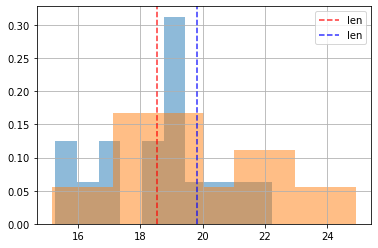

In [9]:
two_histograms(x, y)

__Посох__

In [10]:
mask = np.logical_and(df.unit_1 == 'посох', df.unit_2 == 'посох')
mask1 = np.logical_and(mask, df.unit_3 == 'посох')
mask2 = np.logical_and(mask1, df.unit_4 == 'посох')

conf = df[mask2]
conf_before = conf[conf.balance_mark == 'before']
conf_after = conf[conf.balance_mark == 'after']

x = conf_before.len
y = conf_after.len

print(conf_before.shape[0])
print(conf_after.shape[0])

16
11


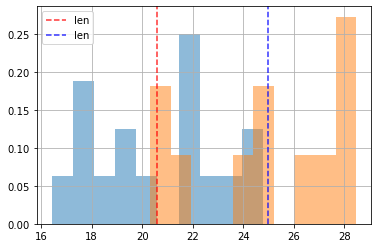

In [11]:
two_histograms(x, y)

/Users/arturignatev/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


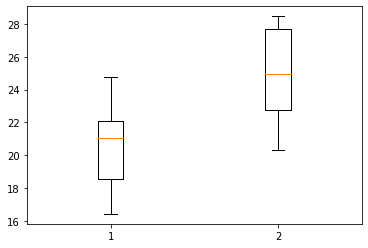

In [12]:
plt.boxplot([x, y])
plt.show()

__Топор__

In [13]:
mask = np.logical_and(df.unit_1 == 'топор', df.unit_2 == 'топор')
mask1 = np.logical_and(mask, df.unit_3 == 'топор')
mask2 = np.logical_and(mask1, df.unit_4 == 'топор')

conf = df[mask2]
conf_before = conf[conf.balance_mark == 'before']
conf_after = conf[conf.balance_mark == 'after']

x = conf_before.len
y = conf_after.len

print(conf_before.shape[0])
print(conf_after.shape[0])

12
12


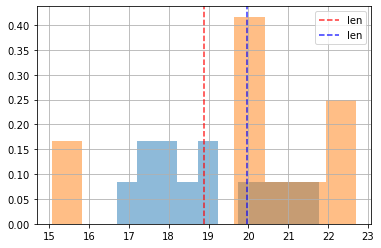

In [14]:
two_histograms(x, y)

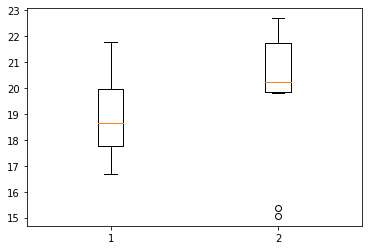

In [15]:
plt.boxplot([x, y])
plt.show()

__Лук__

In [16]:
mask = np.logical_and(df.unit_1 == 'лук', df.unit_2 == 'лук')
mask1 = np.logical_and(mask, df.unit_3 == 'лук')
mask2 = np.logical_and(mask1, df.unit_4 == 'лук')

conf = df[mask2]
conf_before = conf[conf.balance_mark == 'before']
conf_after = conf[conf.balance_mark == 'after']

x = conf_before.len
y = conf_after.len

print(conf_before.shape[0])
print(conf_after.shape[0])

16
21


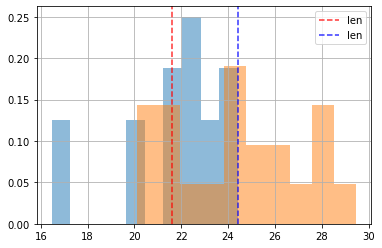

In [17]:
two_histograms(x, y)

/Users/arturignatev/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


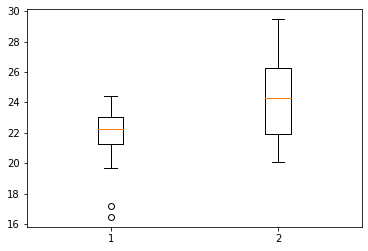

In [18]:
plt.boxplot([x, y])
plt.show()

__Меч__

In [19]:
mask = np.logical_and(df.unit_1 == 'меч', df.unit_2 == 'меч')
mask1 = np.logical_and(mask, df.unit_3 == 'меч')
mask2 = np.logical_and(mask1, df.unit_4 == 'меч')

conf = df[mask2]
conf_before = conf[conf.balance_mark == 'before']
conf_after = conf[conf.balance_mark == 'after']

x = conf_before.len
y = conf_after.len

print(conf_before.shape[0])
print(conf_after.shape[0])

25
20


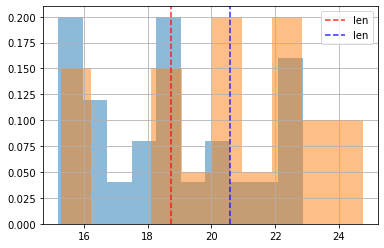

In [20]:
two_histograms(x, y)

/Users/arturignatev/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


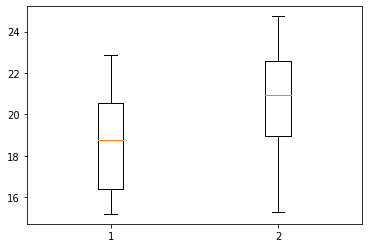

In [21]:
plt.boxplot([x, y])
plt.show()

#### Гипотеза: посох достаточно сильно меняет продолжительность боя

In [22]:
# посмотрим на бои, где был посох

conf = df[df.unit_1 == 'посох']
conf = conf.append(df[df.unit_2 == 'посох'])
conf = conf.append(df[df.unit_3 == 'посох'])
conf = conf.append(df[df.unit_4 == 'посох'])

conf = conf.drop_duplicates(keep='first')

In [23]:
conf

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
1,117214,посох,посох,лук,лук,21.84,before
11,108639,посох,лук,булава,лук,18.73,before
17,107293,посох,лук,лук,меч,17.18,before
21,115757,посох,лук,меч,топор,19.45,before
22,100579,посох,меч,лук,лук,22.75,before
...,...,...,...,...,...,...,...
19933,110647,булава,булава,топор,посох,23.97,after
19956,116932,меч,лук,лук,посох,25.03,after
19959,117390,булава,меч,булава,посох,24.44,after
19964,112010,меч,лук,булава,посох,22.77,after


In [24]:
conf_before = conf[conf.balance_mark == 'before']
conf_after = conf[conf.balance_mark == 'after']

x = conf_before.len
y = conf_after.len

print(conf_before.shape[0])
print(conf_after.shape[0])

5834
5783


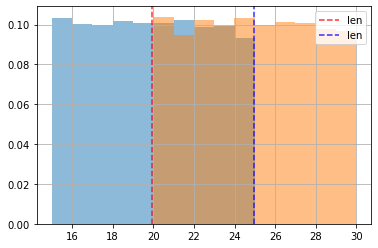

In [25]:
two_histograms(x, y)

/Users/arturignatev/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


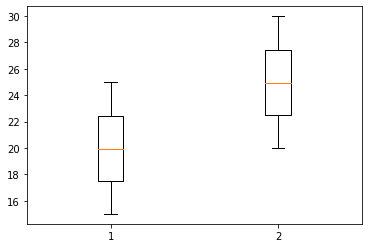

In [26]:
plt.boxplot([x, y])
plt.show()

In [49]:
x

1       21.84
11      18.73
17      17.18
21      19.45
22      22.75
        ...  
9943    16.24
9952    15.71
9990    22.80
9993    20.71
9998    20.08
Name: len, Length: 5834, dtype: float64

In [40]:
expectation_x = []
expectation_y = []

for i in range(10000):
    sample_x = np.random.choice(x, replace=True, size=len(x))
    sample_y = np.random.choice(y, replace=True, size=len(y))
    
    expectation_x.append(sample_x.mean())
    expectation_y.append(sample_y.mean())

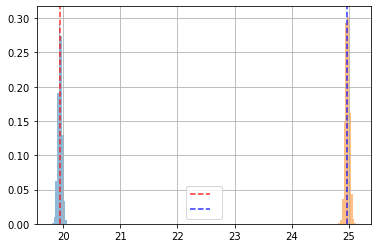

In [41]:
two_histograms(pd.Series(expectation_x), pd.Series(expectation_y))

In [50]:
expectation_x

[19.984214946863215,
 19.937716832362014,
 19.92249400068564,
 19.95007199177237,
 20.035035995886183,
 19.943388755570794,
 19.93931264998286,
 19.91475317106616,
 19.94220603359616,
 19.955306822077475,
 19.91356187864244,
 19.93993829276654,
 19.887845389098388,
 20.036674665752486,
 20.005603359616043,
 19.954285224545767,
 19.920778196777512,
 19.906856359273227,
 19.897050051422692,
 19.905095989029824,
 19.97172951662667,
 19.980773054508056,
 19.92652896811793,
 19.958222488858418,
 19.90515255399383,
 19.959883441892355,
 19.909190949605758,
 19.987816249571477,
 20.01818135070278,
 19.94153753856702,
 19.98694377785396,
 19.952773397326023,
 19.994782310593074,
 19.897386013027084,
 19.96725745629071,
 19.919060678779566,
 19.945210833047653,
 20.060377099760025,
 20.02730716489544,
 19.949122386013027,
 19.93239801165581,
 20.023865272540284,
 19.932872814535482,
 19.9618820706205,
 19.9395594789167,
 19.92301679808022,
 19.95420809050394,
 19.961194720603356,
 20.0340846760